<h1><b>Movie Recommendation System Using NLP and Hybrid Filtering</b></h1>


In [1]:
import pandas as pd

# **Load the dataset**

In [2]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

# **Read The dataset**

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


# **Combination of the dataset**

In [5]:
combined_data = pd.merge(ratings, movies, on='movieId')

In [6]:
combined_data.to_csv("movies-and-ratings.csv", index = False)

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


In [8]:
combined_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


# **Check for null values in the combined dataset**

In [9]:
combined_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

# **Check data types of each column in the combined dataset**

In [10]:
combined_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

# **Perform statistical analysis on the combined dataset**

In [11]:
combined_data.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


# **Data Visualisation**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Question: What is the distribution of movie ratings?**

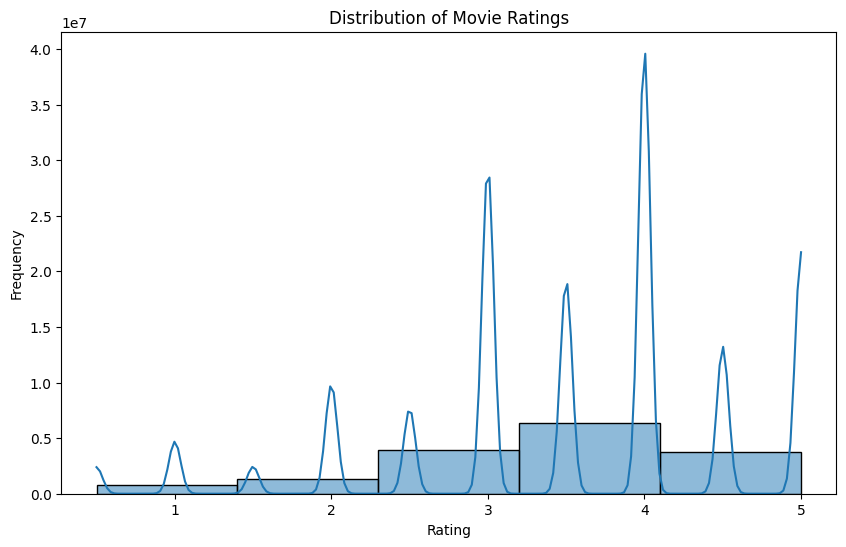

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['rating'], bins=5, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**2. Question: How many movies are there in each genre?**

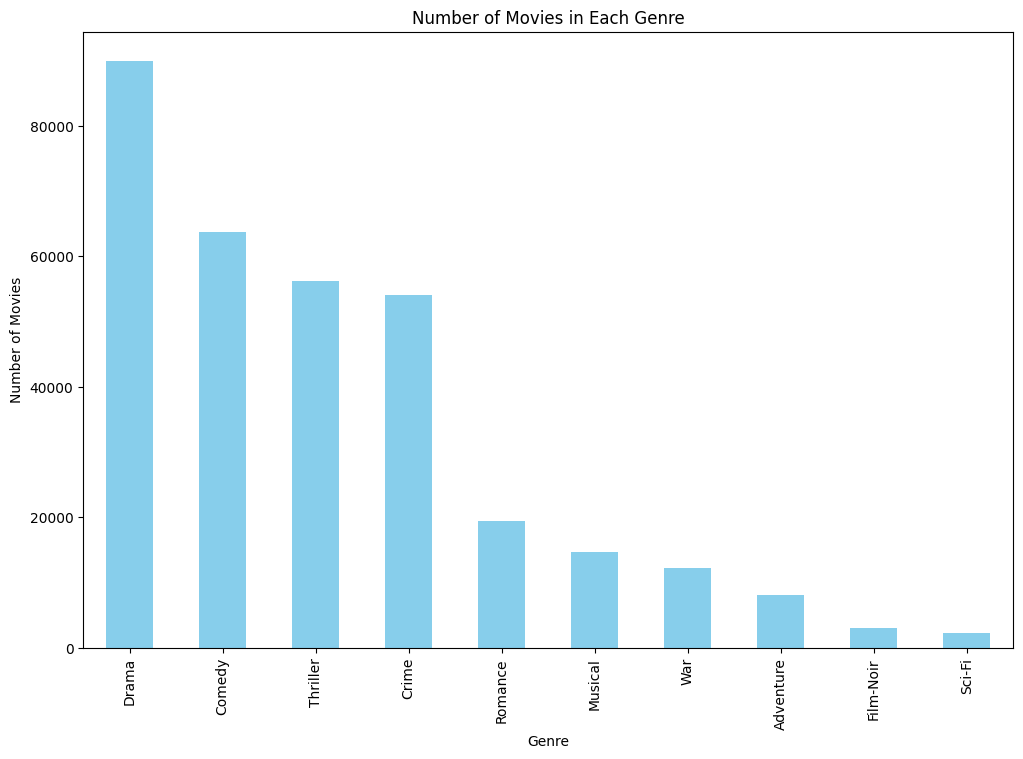

In [13]:
# Count the number of movies in each genre
genre_data = combined_data['genres'].iloc[0:100000]
genre_counts = genre_data.str.split('|', expand=True).stack().value_counts()

# Visualize the number of movies in each genre
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

**3. Question: What are the top 10 most rated movies?**

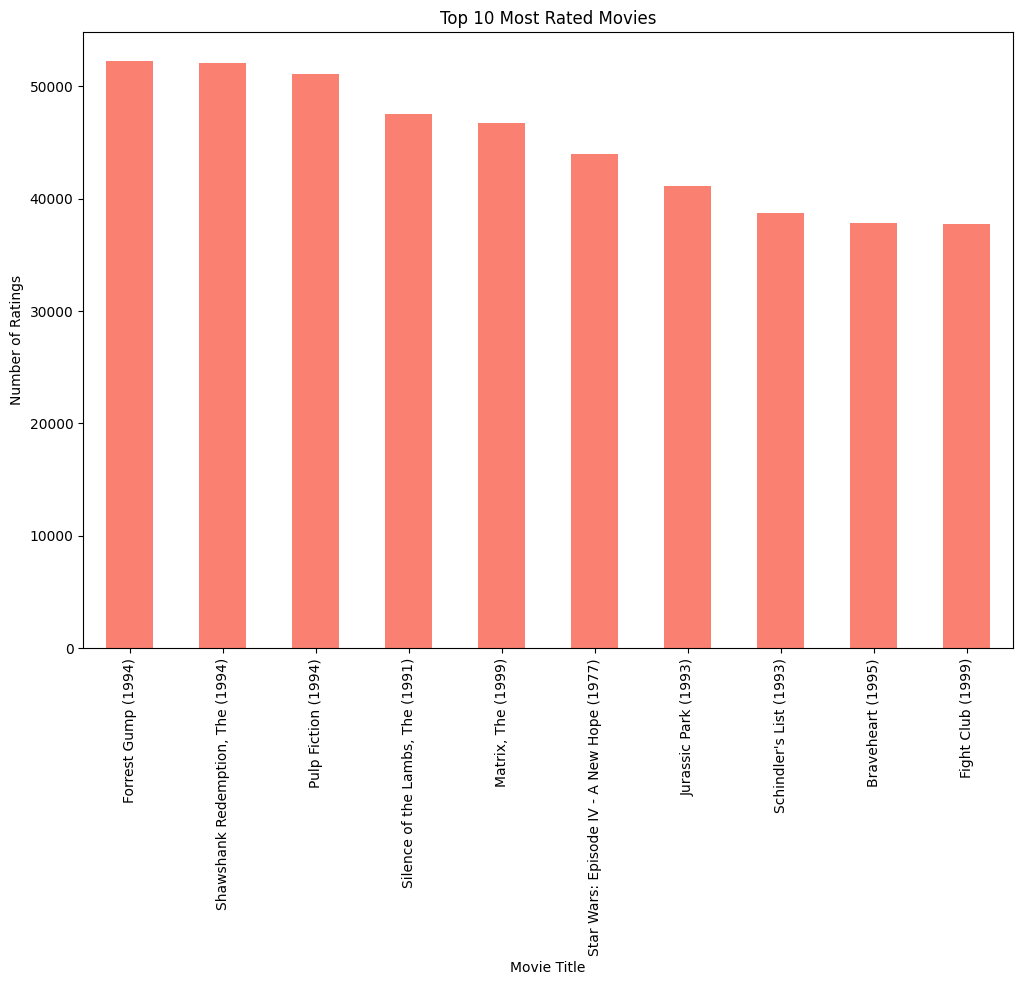

In [14]:
# Find the top 10 most rated movies
top_rated_movies = combined_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

# Visualize the top 10 most rated movies
plt.figure(figsize=(12, 8))
top_rated_movies.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

**4. How does the average rating vary with the number of ratings received by a movie?**

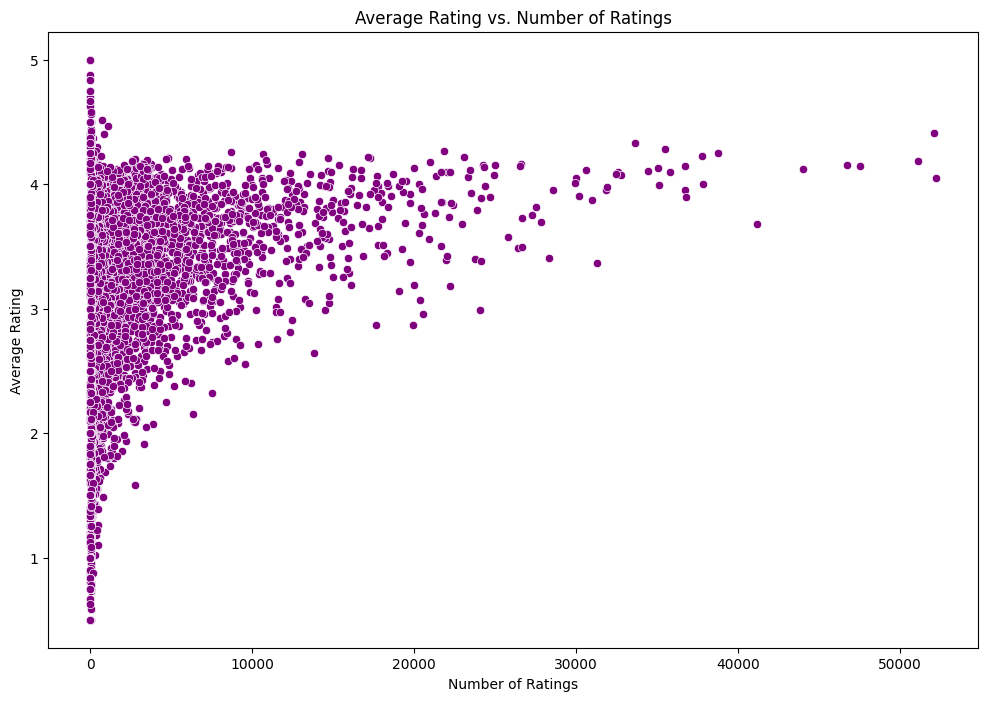

In [15]:
ratings_count = combined_data.groupby('title')['rating'].count()

avg_rating = combined_data.groupby('title')['rating'].mean()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=ratings_count, y=avg_rating, color='purple')
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

#**Movie Reccomendation Using NLP**

In [12]:
import spacy

# Load the English language model from SpaCy
nlp = spacy.load('en_core_web_sm')

In [13]:
# Shuffling the data before slicing the dataframe to nullify data biasness
model_data = combined_data.sample(frac=1).reset_index(drop=True)

In [14]:
model_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,15435,115617,4.0,1467783032,Big Hero 6 (2014),Action|Animation|Comedy
1,75602,648,4.0,843219578,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
2,70130,106540,1.0,1462829763,Delivery Man (2013),Comedy
3,23206,31424,2.5,1267337615,Alone in the Dark (2005),Action|Horror|Sci-Fi|Thriller
4,112474,47,4.5,1117658649,Seven (a.k.a. Se7en) (1995),Mystery|Thriller


In [15]:
combined_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [16]:
model_data = combined_data.iloc[0:10]

In [19]:
import spacy
import pandas as pd
from spacy import displacy

# Loading the English language model from SpaCy
nlp = spacy.load('en_core_web_sm')

# Applying NLP to movie titles
model_data['title_nlp'] = model_data['title'].apply(nlp)

# Visualizing named entities in an example movie title
example_title = model_data['title'].iloc[0]
example_title_doc = nlp(example_title)

# Displaying named entities visualization
displacy.render(example_title_doc, style='ent', jupyter=True)

# Showing the visualization
plt.show()

<ipython-input-19-fc91045797b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['title_nlp'] = model_data['title'].apply(nlp)


In [19]:
# !pip install scikit-surprise

# **Hybrid Filtering Using The "surprise" Package**

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Data preparation
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(model_data[['userId', 'movieId', 'rating']], reader)

# Feature selection
trainset, testset = train_test_split(data, test_size=0.2)

# Training the model
algo = SVD()
algo.fit(trainset)

# Testing the model
predictions = algo.test(testset)

# Model evaluation
accuracy.rmse(predictions)

# Applying Hybrid Filtering
def hybrid_recommendation(user_id, title, n=10):
    # Collaborative Filtering
    cf_predictions = [(algo.predict(user_id, row['movieId']).est, row['movieId']) for index, row in combined_data.iterrows()]

    # Applying Content-Based Filtering
    content_based_scores = []
    title_doc = nlp(title)
    for index, row in combined_data.iterrows():
        similarity_score = title_doc.similarity(row['title_nlp'])
        content_based_scores.append((similarity_score, row['movieId']))

    # Combining the results
    hybrid_scores = [(0.5 * cf_score + 0.5 * cb_score, movie_id) for (cf_score, movie_id), (cb_score, _) in zip(cf_predictions, content_based_scores)]

    # Determining top recommendation
    hybrid_scores.sort(reverse=True)
    top_recommendations = [movie_id for _, movie_id in hybrid_scores[:n]]
    return top_recommendations

user_id = 1
user_favorite_movie = 'Pulp Fiction (1994)'
recommended_movies = hybrid_recommendation(user_id, user_favorite_movie)
print(recommended_movies)

RMSE: 0.4601
